# 🧪 Analyse exploratoire du dataset Jigsaw (français)

In [1]:
!pip install pandas matplotlib seaborn wordcloud

  Using cached matplotlib-3.10.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 2.5 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp312-cp312-macosx_11_0_arm64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 6.6 MB/s eta 0:00:00
Using cached contourpy-1.3.2-cp312-cp312-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.0 MB/s eta 0:00:0000:0100:01
Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11_0_

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string

# Affichage plus lisible
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Chargement des données
df = pd.read_csv("../data/jigsaw_toxic_fr_clean.csv")

# Nettoyage de colonnes inutiles si présentes
df = df.loc[:, ~df.columns.str.startswith("Unnamed")]
df.head()


,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"Hé mec, je n'essaye vraiment pas de modifier l...",0,0,0,0,0,0
1,"""\n\nFélicitations de ma part également, utili...",0,0,0,0,0,0
2,Le point Mitsurugi n'avait aucun sens - pourqu...,0,0,0,0,0,0
3,"""\nPlus\nJe ne peux pas faire de véritables su...",0,0,0,0,0,0
4,alignement sur ce sujet et qui sont contraires...,0,0,0,0,0,0


## 📊 Répartition des types de toxicité

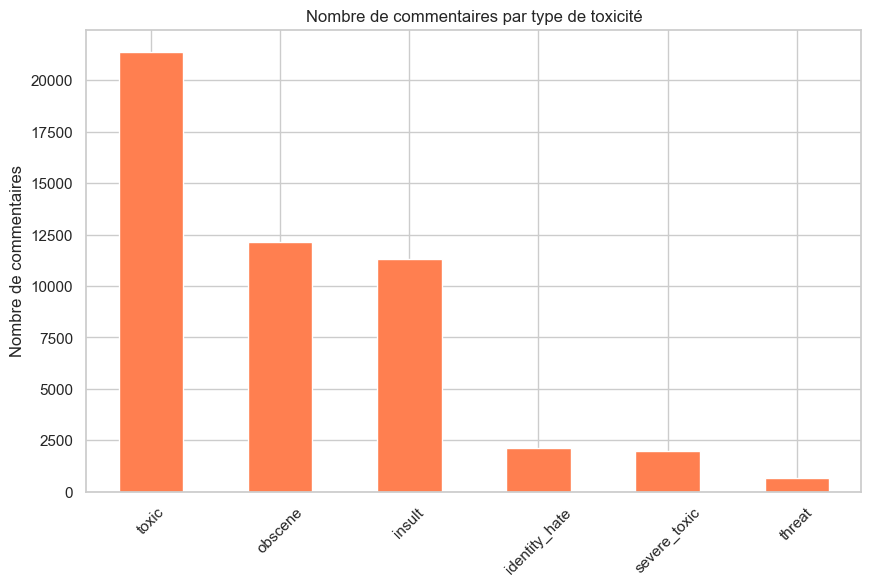

In [10]:
label_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
df[label_cols].sum().sort_values(ascending=False).plot(kind="bar", color="coral")
plt.title("Nombre de commentaires par type de toxicité")
plt.ylabel("Nombre de commentaires")
plt.xticks(rotation=45)
plt.show()


## ✂️ Longueur des commentaires

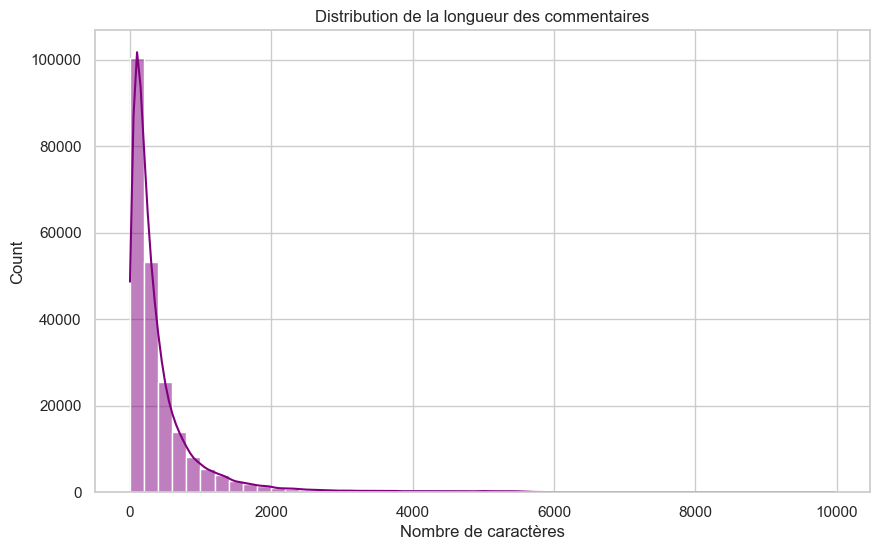

In [11]:
df["comment_length"] = df["comment_text"].apply(len)

sns.histplot(df["comment_length"], bins=50, kde=True, color="purple")
plt.title("Distribution de la longueur des commentaires")
plt.xlabel("Nombre de caractères")
plt.show()


## ☁️ Nuages de mots : Toxiques vs Non-Toxiques

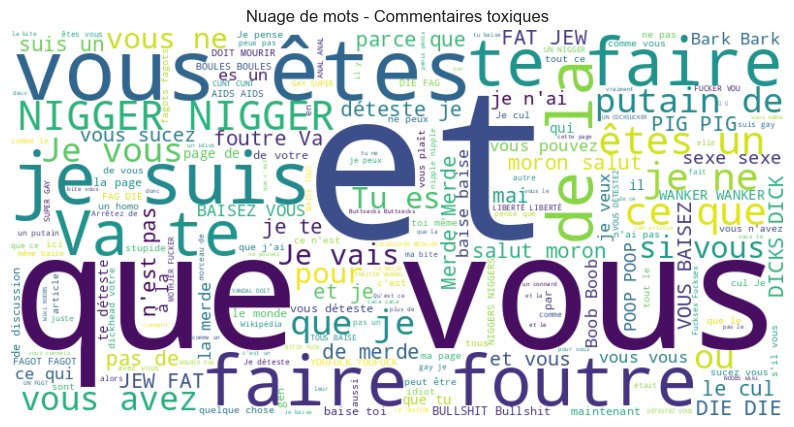

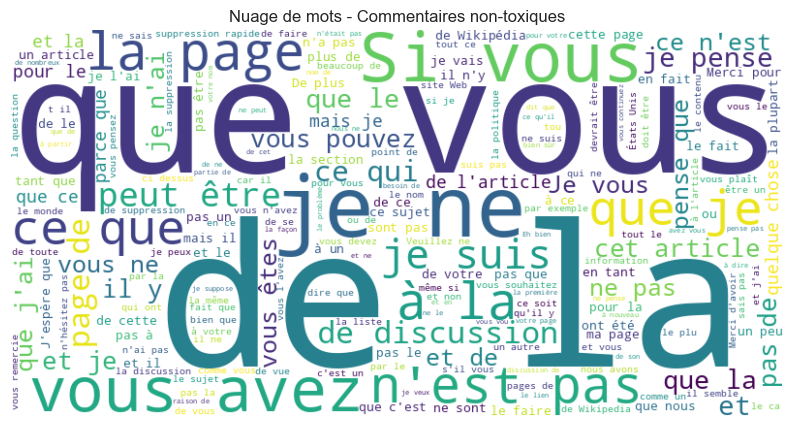

In [12]:
from wordcloud import STOPWORDS

# Séparer les textes
toxic_comments = " ".join(df[df["toxic"] == 1]["comment_text"])
non_toxic_comments = " ".join(df[df["toxic"] == 0]["comment_text"])

stopwords = set(STOPWORDS)
stopwords.update(["les", "des", "ces", "cela", "est", "avec", "sans", "une", "dans", "sur", "au", "aux"])

# WordCloud Toxique
wc_toxic = WordCloud(width=800, height=400, stopwords=stopwords, background_color="white").generate(toxic_comments)
plt.imshow(wc_toxic, interpolation="bilinear")
plt.axis("off")
plt.title("Nuage de mots - Commentaires toxiques")
plt.show()

# WordCloud Non-Toxique
wc_non_toxic = WordCloud(width=800, height=400, stopwords=stopwords, background_color="white").generate(non_toxic_comments)
plt.imshow(wc_non_toxic, interpolation="bilinear")
plt.axis("off")
plt.title("Nuage de mots - Commentaires non-toxiques")
plt.show()


## 🔗 Corrélation entre les types de toxicité

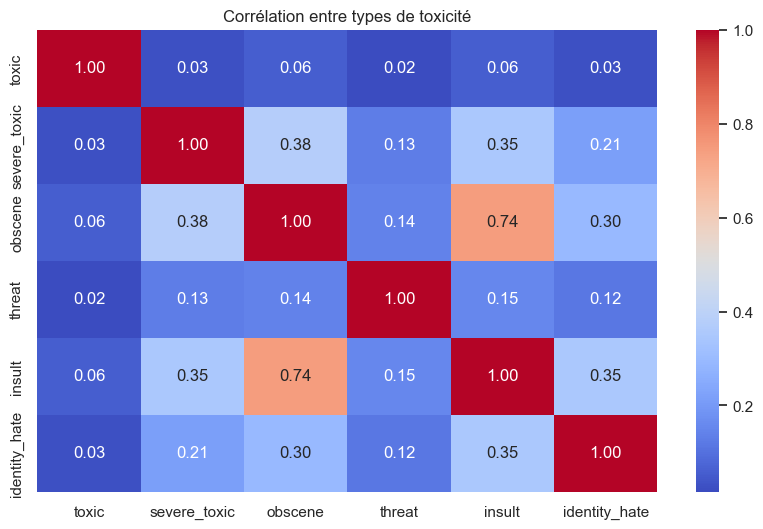

In [13]:
corr_matrix = df[label_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre types de toxicité")
plt.show()
